In [21]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import spearmanr

# **Questão 1:** A média medida eigenvector centrality da rede USairport500 é igual a quanto? Considere apenas o maior componente. Use:



G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)



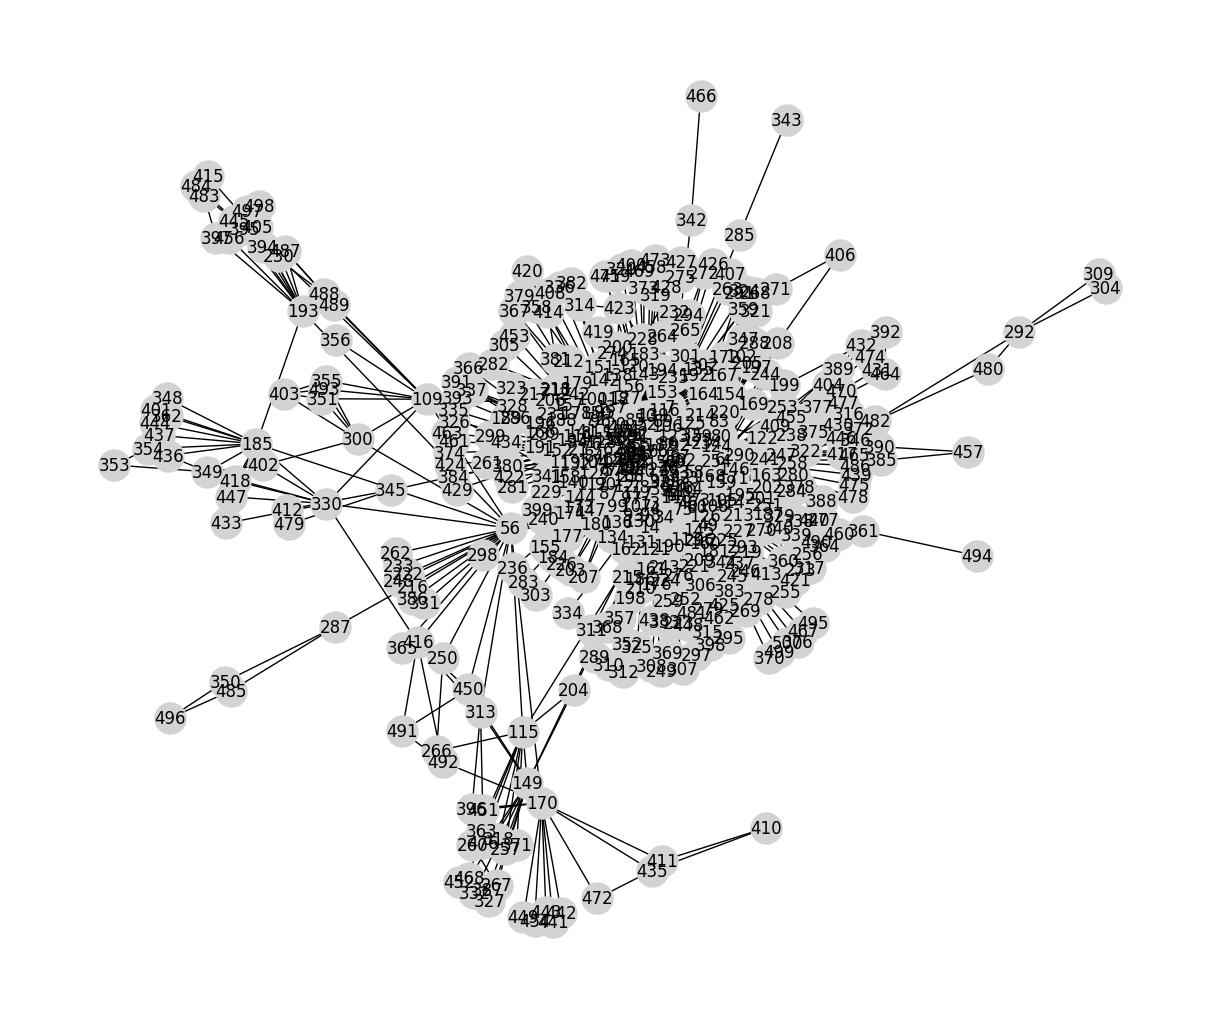

In [9]:
G= G=nx.read_edgelist("USairport500.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [10]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [11]:
EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
print('Eigenvetor centrality:', EC)

Eigenvetor centrality: {0: 0.19076801166001284, 1: 0.03636566857696688, 2: 0.0691626602921969, 3: 0.003968107284167804, 4: 0.008793199264018935, 5: 0.07118060019092086, 6: 0.04546430744771243, 7: 0.07323642015910903, 8: 0.01730443424706561, 9: 0.017922732745642947, 10: 0.0897698767865774, 11: 0.07380066147981246, 12: 0.02184958926877229, 13: 0.12467071731482425, 14: 0.131436508778258, 15: 0.003968107284167804, 16: 0.023602572915143526, 17: 0.07362620372650132, 18: 0.13953024621380883, 19: 0.04641141422804443, 20: 0.02448577438054315, 21: 0.01743753895063849, 22: 0.02329810285937023, 23: 0.04561503424842579, 24: 0.13802628925967486, 25: 0.14913393470874747, 26: 0.09676493405122416, 27: 0.046025725596912495, 28: 0.012354640796703582, 29: 0.03949654624376495, 30: 0.007070203451269203, 31: 0.17727093382439202, 32: 0.016769651517526653, 33: 0.020450615709312264, 34: 0.06667976179297104, 35: 0.1307198987514137, 36: 0.15277202028115405, 37: 0.178220963174855, 38: 0.003968107284167804, 39: 0.0

In [12]:
# Encontrando a centralidade média do autovetor

EC = list(EC.values())
av_EC = np.mean(EC)
print('Centralidade média do autovetor', round(av_EC,2))

Centralidade média do autovetor 0.02


# **Questão 2:** Calcule a correlação de Pearson entre a medida betweeness centrality e grau para a rede hamsterster. Use:



G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)

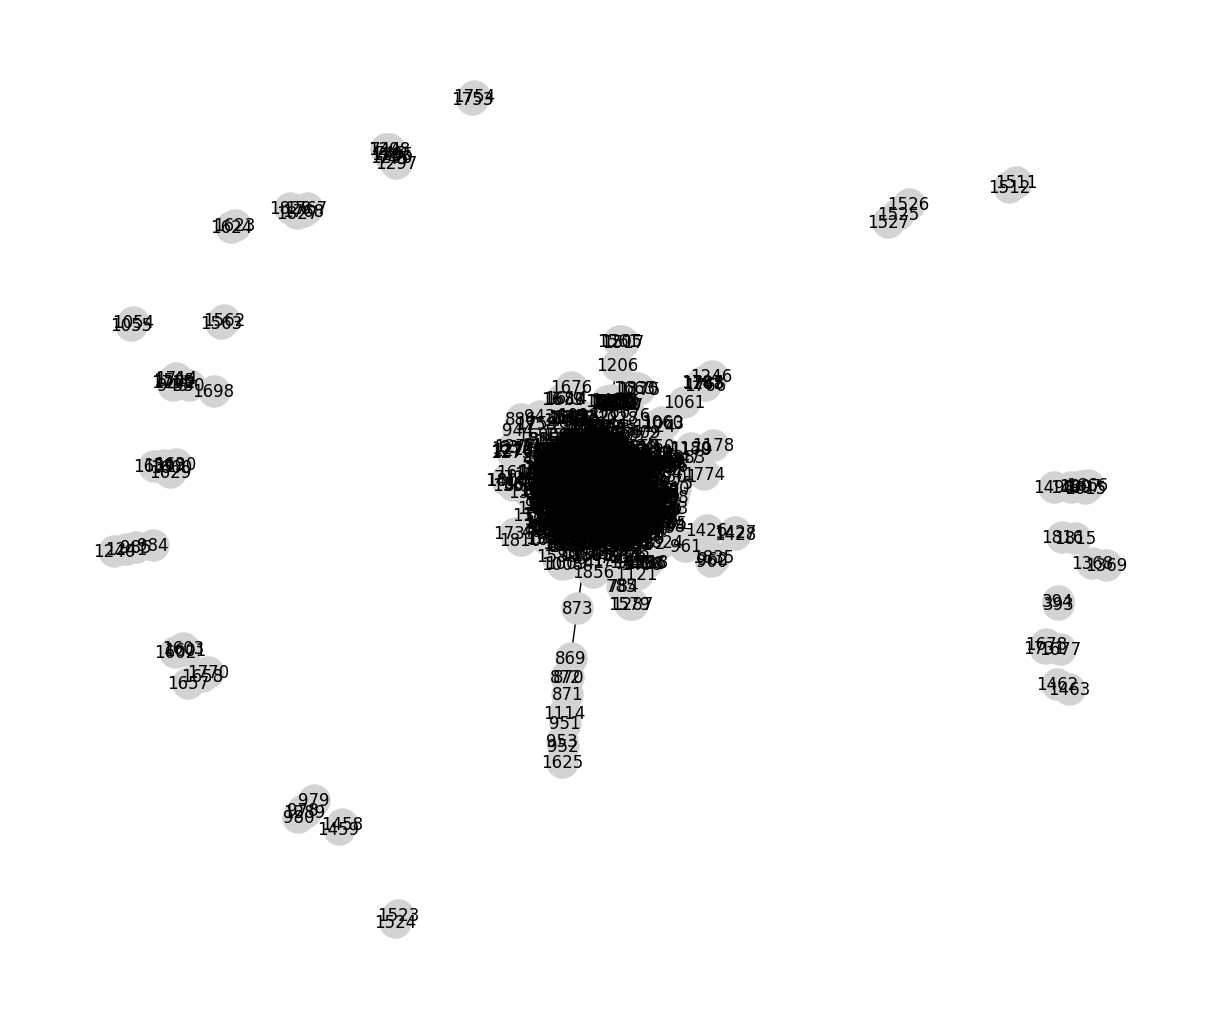

In [13]:
G= G=nx.read_edgelist("hamsterster.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [14]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [18]:
# Calcular grau dos nós
degree_dict = dict(G.degree())
degrees = np.array(list(degree_dict.values()))

# Calcular betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness = np.array(list(betweenness_dict.values()))

# Calcular correlação de Pearson
correlation = np.corrcoef(degrees, betweenness)[0, 1]

print(f"Correlação de Pearson entre betweenness centrality e grau: {round(correlation,1)}")

Correlação de Pearson entre betweenness centrality e grau: 0.8


# **Questão 3:** Calcule o coeficiente de correlação de Spearman entre as medidas closeness centrality e k-core para a rede "Jazz".

Use:

G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)

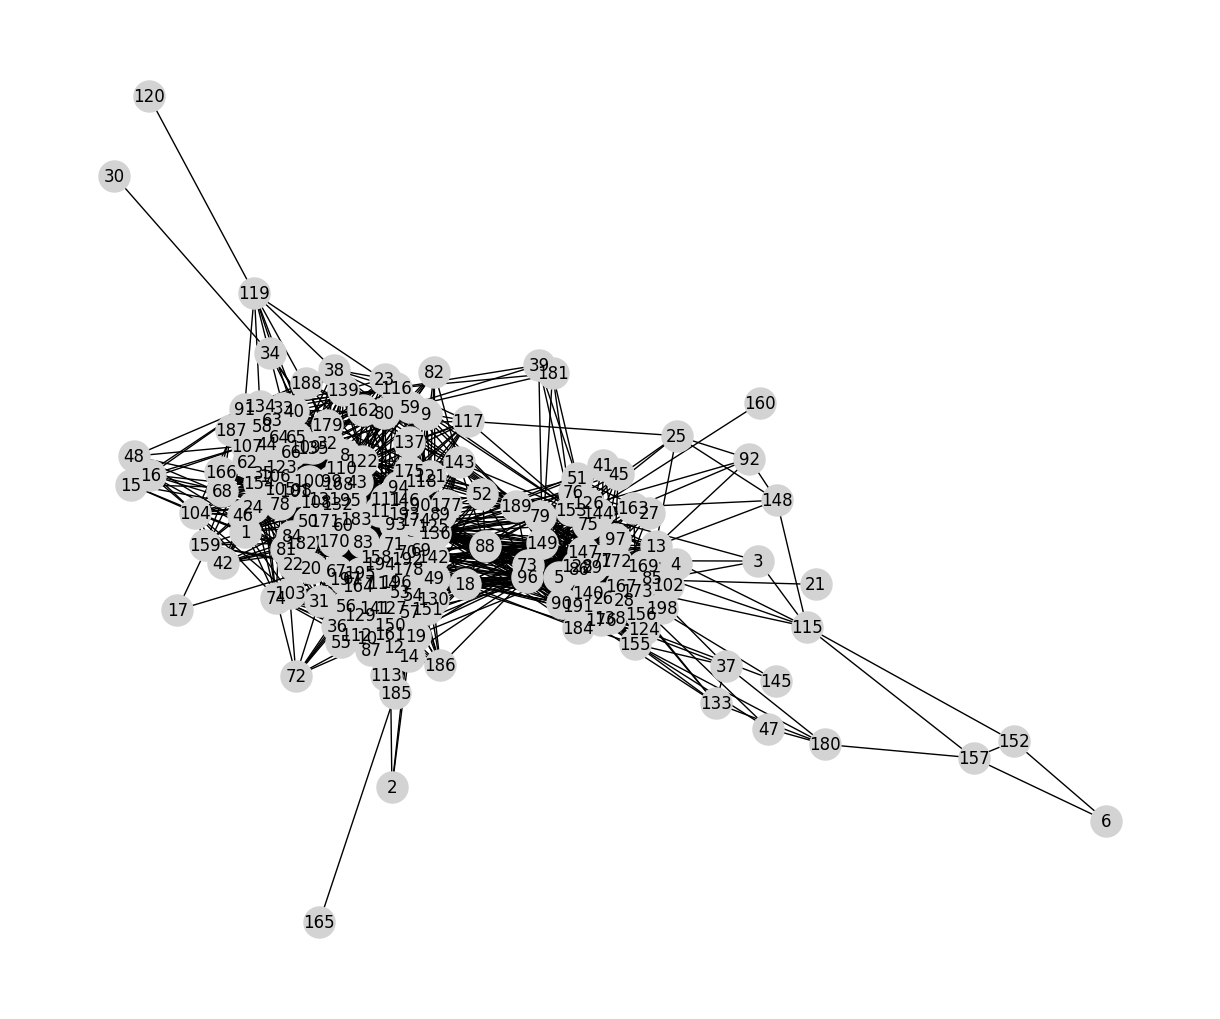

In [19]:
G= G=nx.read_edgelist("jazz.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [20]:
# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [23]:
# Calcular closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness = np.array(list(closeness_dict.values()))

# Calcular k-core
k_core_dict = nx.core_number(G)
k_core = np.array(list(k_core_dict.values()))

# Calcular coeficiente de Spearman
spearman_corr, _ = spearmanr(closeness, k_core)

print(f"Correlação de Spearman entre closeness centrality e k-core: {round(spearman_corr,1)}")

Correlação de Spearman entre closeness centrality e k-core: 0.7
